# Project Name: Breast Cancer Classifier

### Goal: To predict the type of tumour of patient.

**Dataset**: Kaggle Breast Cancer Dataset (https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

**About the Project**: Cancer diagnosis, particularly distinguishing between malignant (cancerous) and benign (non-cancerous) tumors, is crucial for effective treatment and patient outcomes. Traditional diagnostic methods, such as imaging and biopsies, are often invasive and costly.

Our goal is to support medical practitioners in improving patient outcomes and enhancing overall community health. This tool will streamline the diagnostic process, potentially reducing the need for invasive procedures and lowering healthcare costs.

This project aims to develop a Machine Learning model to predict whether a patient has a malignant or benign tumor using patient data such as tumor size, cell shape, and other relevant medical information. By leveraging historical data and advanced algorithms, our model seeks to assist healthcare professionals in making accurate and timely diagnoses.lth.

### Section 1: Collecting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\goura\Desktop\Data Science\Datasets\Breast Cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Section 2: Data Manipulation/Cleaning

Lets figure out the data types of columns in our dataset

In [3]:
columns = [ i for i in data.columns ]
numeric = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categoric = [ i for i in data.columns if i not in numeric ]

In [4]:
categoric

['diagnosis']

Looks like we've got one categorical column in our dataset.
In such situations, we can either
* Drop the column if not relevant
* Encode the column values

Since Diagnosis is an important parameter ( the parameter we'll be predicting ), it is should be encoded instead of dropping

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["diagnosis"] = encoder.fit_transform(data["diagnosis"])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We can observe the following:<br>
Diagnosis: 1 = M = Malignant<br>
Diagnosis: 0 = B = Benign

In [6]:
d={
    1:"Malignant",
    0:"Benign"
}

We'd also not need the 'ID' column, since it has no actual correlation to the type of tumout.<br> So we will remove it from the dataset so that it doesn't disturb the prediction quality.

In [7]:
features = [ i for i in columns if i not in ('diagnosis','id') ]
label = ['diagnosis']
X = data[features]
Y = data[label]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
corr_matrix = data.corr()
corr_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


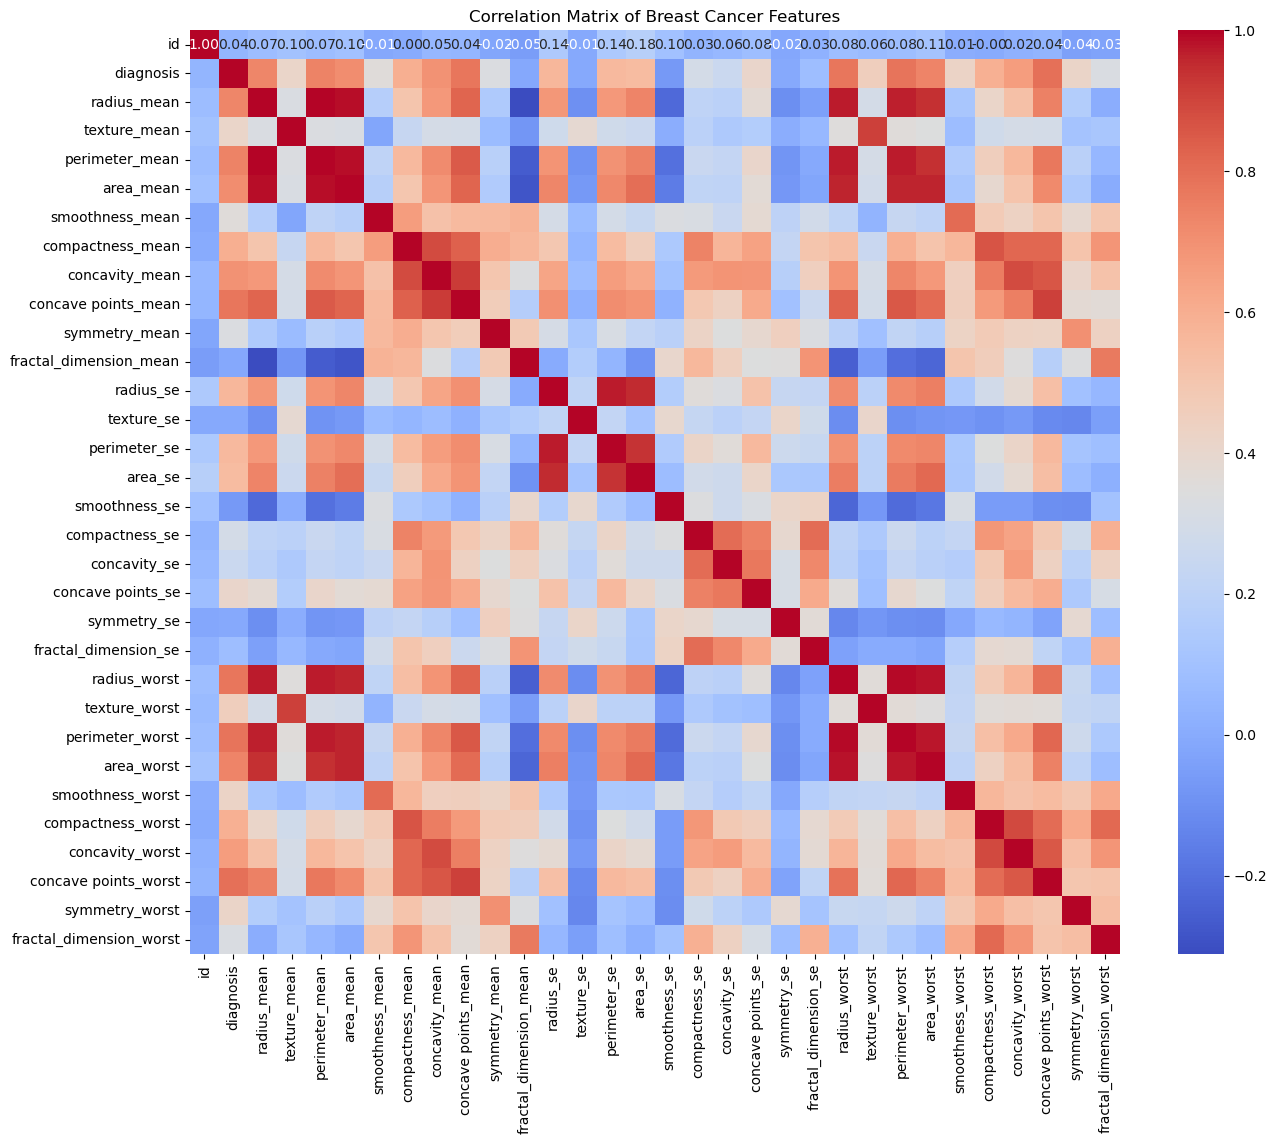

In [9]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

As it can be seen, all of the features except 'ID' have a significant correlation to 'diagnosis'.<br>
So, we retain all such features.

In [10]:
for feature in features:
    null_count = data[feature].isnull().sum()
    print(feature, null_count, (null_count/569)*100)

radius_mean 0 0.0
texture_mean 0 0.0
perimeter_mean 0 0.0
area_mean 0 0.0
smoothness_mean 0 0.0
compactness_mean 0 0.0
concavity_mean 0 0.0
concave points_mean 0 0.0
symmetry_mean 0 0.0
fractal_dimension_mean 0 0.0
radius_se 0 0.0
texture_se 0 0.0
perimeter_se 0 0.0
area_se 0 0.0
smoothness_se 0 0.0
compactness_se 0 0.0
concavity_se 0 0.0
concave points_se 0 0.0
symmetry_se 0 0.0
fractal_dimension_se 0 0.0
radius_worst 0 0.0
texture_worst 0 0.0
perimeter_worst 0 0.0
area_worst 0 0.0
smoothness_worst 0 0.0
compactness_worst 0 0.0
concavity_worst 0 0.0
concave points_worst 0 0.0
symmetry_worst 0 0.0
fractal_dimension_worst 0 0.0


Since our dataset has no Null values, we dont need to worry about that either.

Now that our data is ready for use, we will split it into 4 parts, based on- 
* Features, Label [ to distinguish the columns used to make predictions and the column to be predicted ]
* Train, Test [ to distinguish data we will train our model on and data we will test the trained model on ]

We will use the **Stratified Shuffle Split**, due to such splits being a representatinve of the entire dataset.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.15, random_state=42)
for train_index,test_index in split.split(data,data[label]):
    train_set = data.iloc[train_index]
    test_set = data.iloc[test_index]

In [12]:
train_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
357,901028,0,13.870,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.020880,...,15.11,25.58,96.74,694.4,0.1153,0.1008,0.05285,0.05556,0.2362,0.07113
352,899987,1,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,...,33.13,23.58,229.30,3234.0,0.1530,0.5937,0.64510,0.27560,0.3690,0.08815
224,8813129,0,13.270,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
467,9113514,0,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,905686,0,11.890,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.021790,...,13.05,27.21,85.09,522.9,0.1426,0.2187,0.11640,0.08263,0.3075,0.07351
458,9112594,0,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.017620,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
476,911654,0,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.030580,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
72,859717,1,17.200,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,...,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.65660,0.18990,0.3313,0.13390


In [13]:
X_train = train_set[features]
Y_train = train_set[label]
X_test = test_set[features]
Y_test = test_set[label]

Lets have a look at alll the created parts of the dataset. 
* X (all rows of feature columns),
* Y (all rows of label column),
* X_train (training rows of feature columns),
* X_test (testing rows of feature columns),
* Y_train (training rows of label column),
* Y_test (testing rows of label column)

### Section 3: Model Selection & Training

We proceed with the use of KNN algorhithm for this classification problem.

We set up an algorhithm to give us the optimal number of neighbors for the KNN model, by recognising the least MSE for all number of neighbours in the range [1,51,2]

We use cross-validation as a measure for testing our model.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
neighbors = [] 
cv_scores = [] 
Y_train = Y_train.values.ravel()
from sklearn.model_selection import cross_val_score  
for k in range(1, 51, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knn, X_train, Y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean()) 

The optimal number of neighbors is  3 


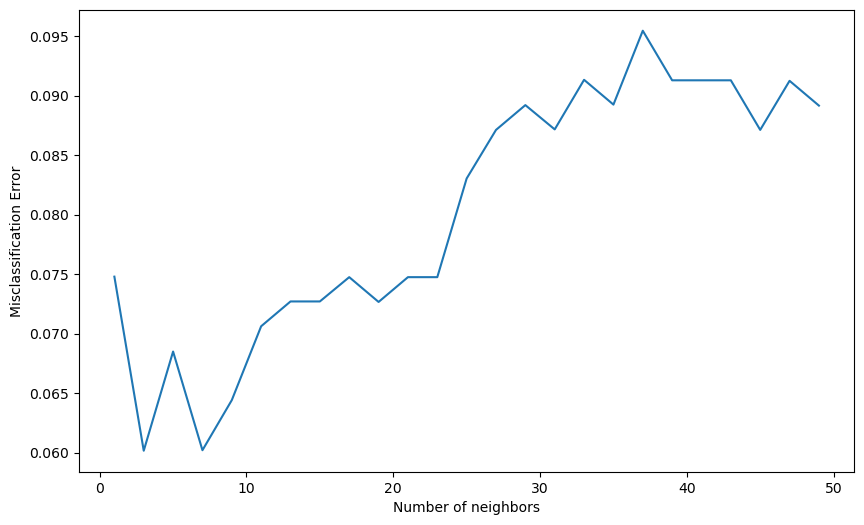

In [16]:
MSE = [1-x for x in cv_scores] 

optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 

plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

As we can see, the optimum number of neighbours for the dataset in question is 3.<br>
So, we prepare our model appropriately.

In [17]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

Lets check for the accuracy of the model using **Accuracy_Score**

In [18]:
pred1 = knn_model.predict(X_test)
accuracy_score(Y_test,pred1)

0.9069767441860465

We have acheived an accuracy of 91%.<br>
Our next step is to make this program user interactive, such that the program can provide the disease name as the output for some set of symptoms as input.

### Section 4: Creating User-Model interaction space

Since our models make numerical predictions (due to being encoded earlier), we need to convert these numerical output to meaningful output i.e. type of the tumour

Below is a function to receive the values for required attributes, and thus make appropriate changes to make the predictions.

In [19]:
Y = Y.values.ravel()
knn_model.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [21]:
c=0
ques = features
while True:
    if c==0:
        print("Do you want to make any predictions?")
    elif c>0:
        print("Do you want to make any more predictions?")
    print("Enter 1 if Yes, else 0")
    a = int(input("Choice:"))
    if a!=0 and a!=1:
        print("Invalid Choice")
    elif a==0:
        print("Choice is No (0)")
        print("Exit Program")
        if c>0:
            print("Thank you for using our services.")
        break
    elif a==1:
        print("Choice is Yes (1)")
        lst = []
        for i in ques:
            lst.append(float(input(f"Enter value of {i}: ")))
        df = pd.DataFrame([lst], columns=ques)
        knn_pred = knn_model.predict(df)
        type = d[knn_pred[0]]
        print("Reported Parameters: ",lst)
        print("The tumour type is predicted to be:",type)
        c+=1
    

Do you want to make any predictions?
Enter 1 if Yes, else 0


Choice: 1


Choice is Yes (1)


Enter value of radius_mean:  3
Enter value of texture_mean:  3
Enter value of perimeter_mean:  3
Enter value of area_mean:  3
Enter value of smoothness_mean:  33
Enter value of compactness_mean:  3
Enter value of concavity_mean:  3
Enter value of concave points_mean:  3
Enter value of symmetry_mean:  3
Enter value of fractal_dimension_mean:  3
Enter value of radius_se:  3
Enter value of texture_se:  3
Enter value of perimeter_se:  3
Enter value of area_se:  3
Enter value of smoothness_se:  3
Enter value of compactness_se:  3
Enter value of concavity_se:  3
Enter value of concave points_se:  3
Enter value of symmetry_se:  3
Enter value of fractal_dimension_se:  3
Enter value of radius_worst:  3
Enter value of texture_worst:  3
Enter value of perimeter_worst:  3
Enter value of area_worst:  3
Enter value of smoothness_worst:  3
Enter value of compactness_worst:  3
Enter value of concavity_worst:  3
Enter value of concave points_worst:  3
Enter value of symmetry_worst:  3
Enter value of fr

Reported Parameters:  [3.0, 3.0, 3.0, 3.0, 33.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
The tumour type is predicted to be: Benign
Do you want to make any more predictions?
Enter 1 if Yes, else 0


Choice: 0


Choice is No (0)
Exit Program
Thank you for using our services.


Since all our models have been defined, and set to actively accept provided data and provide predictions,<br> our program is ready to use and the project is complete

### Conclusion

This marks the end of our program.

We predicted the type of tumour of patients based on various attributes related to the tumour from, by using K Nearest Neiighbors algorhithm to find the final prediction.
Our model predictictions have yet provided us with 91% accuracy, we can conclude that our  model will provide us with predictions of decent accuracy on unknown & similar datasets.